<a href="https://colab.research.google.com/github/venkatesh1226/CMPE255-DataMining/blob/main/document_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Understanding and Initial Exploration

In [ ]:
!pip install pandas


In [ ]:
import zipfile
import os

# File path for the uploaded chess dataset
zip_file_path = '/content/drive/MyDrive/DM_Assignment_06/chess.zip'
extracted_folder_path = '/content/drive/MyDrive/DM_Assignment_06/chess'

# Unzipping the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder_path)

# Listing the contents of the extracted folder
extracted_files = os.listdir(extracted_folder_path)
extracted_files


['Chess Strategy by Edward Lasker.txt', 'Game-Meta.csv', 'Games', 'clean.txt']

The Game-Meta.csv file provides metadata for various chess games. The columns include:

White: The player playing white pieces.

Black: The player playing black pieces.

Place: The location where the game was played.

Year: The year in which the game took place.

Opening: The opening move or strategy used in the game.

No_of_moves: The total number of moves in the game.

Winner: The winner of the game (White, Black, or Drawn).

First_move: The first move of the game.

Game-file: The file name containing the details of the game.

This metadata could be useful for contextualizing the text data from the games. Next, let's explore the contents of the Games folder to understand what kind of data it holds, as this will likely be our primary data source for text clustering. We'll list the first few files in the Games folder to get an idea of its contents.

In [ ]:
import pandas as pd

# Path to the Game-Meta.csv file
csv_file_path = os.path.join(extracted_folder_path, 'Game-Meta.csv')

# Loading the CSV file
game_meta_df = pd.read_csv(csv_file_path)

# Displaying the first few rows of the DataFrame
game_meta_df.head()


,White,Black,Place,Year,Opening,No_of_moves,Winner,First_move,Game-file
0,Tartakower,Burn,Carlsbad,1911,King's Gambit,30,Black,1-e4,Game-1.txt
1,Leonhardt,Marshall,San Sebastian,1911,Falkbeer Counter Gambit,36,Black,1-e4,Game-2.txt
2,Spielmann,Prokes,Prag,1908,Vienna Game,21,White,1-e4,Game-3.txt
3,Tarrasch,Capablanca,San Sebastian,1911,Giuoco Piano,38,Drawn,1-e4,Game-4.txt
4,Griffith,Gunston,London,1902,Giuoco Piano,37,Black,1-e4,Game-5.txt


The Games folder contains text files, each likely representing a single game. The files are named in the format Game-X.txt, where X is the game number. This structure corresponds with the Game-file column in the Game-Meta.csv, suggesting that each text file contains detailed information about a specific chess game.

To proceed, let's:

Examine a Sample Game File: We'll read one of the game files to understand its content and format.
Decide on the Approach for Text Data: Based on the content of the game files, we will determine how to process and use this text data for clustering.
Let's start by reading the content of the first game file (Game-1.txt) to get a sense of what kind of data we're dealing with.

In [ ]:
# Path to the Games folder
games_folder_path = os.path.join(extracted_folder_path, 'Games')

# Listing the first few files in the Games folder
game_files = os.listdir(games_folder_path)
game_files[:5]  # Displaying the first five files in the folder


['Game-1.txt', 'Game-10.txt', 'Game-11.txt', 'Game-12.txt', 'Game-13.txt']

The content of Game-1.txt includes:

Game Number and Player Information: The start of the document specifies the game number, players, and the opening used.

Move-by-Move Analysis: The document details each move made in the game, along with some commentary and analysis.

Chessboard Diagrams: There are ASCII representations of the chessboard at various stages of the game.

Conclusion of the Game: The document ends with the outcome of the game and final moves.

Given this structure, our approach for clustering will focus on the text-based analysis and commentary of each game. This text provides insights into the strategies, moves, and context of the game, making it suitable for document clustering.

In [ ]:
import os
import re
import string

# Function to preprocess text data
def preprocess_text(text):
    # Remove ASCII chessboard diagrams (or any ASCII art)
    text = re.sub(r'\n\s+[|+-]+', '', text)

    # Convert to lowercase
    text = text.lower()

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    return text

# Path to the Games folder (update this with the correct path in your environment)
games_folder_path = '/content/drive/MyDrive/DM_Assignment_06/chess/Games'

# Processing the first few files as a sample
preprocessed_texts = []
for game_file in sorted(os.listdir(games_folder_path))[:48]:  # Adjust the number as needed
    game_file_path = os.path.join(games_folder_path, game_file)
    with open(game_file_path, 'r') as file:
        game_content = file.read()
        preprocessed_content = preprocess_text(game_content)
        preprocessed_texts.append(preprocessed_content)

# Displaying the preprocessed text of the first file
print(preprocessed_texts[0])


                game no 1

    white tartakower   black burn

   king’s gambit declined compare p 30

          1 pk4         pk4
          2 pkb4        bb4
          3 ktkb3       pq3
          4 pxp

on principle this exchange cannot be commended as the opening of
the queen’s file increases the black queen’s mobility  white
derives no benefit from the kb file so long as the black bishop
makes castling impossible white intends to play pb3 and pq4
but the manœuvre is doubtful and the whole opening includes an
inordinately large number of pawn moves in the present game
black exposes the failings inherent to this system unequivocally

          4           pxp
          5 pb3         ktqb3

black cannot put off white’s pq4 by bkkt5 for white can give a
check with the queen and unpin the knight

          6 pqkt4

the object of this move is not clear as pkt5 does not win a
pawn ktr4 8 ktxp 9 qr5ch it does not promote development
either and only compromises the qbp and qktp

          6  

Generate LLM Embeddings: We'll use a state-of-the-art language model to convert the preprocessed text into numerical embeddings.

Clustering: We'll apply clustering algorithms to these embeddings.

For generating LLM embeddings, we can use models like BERT, GPT, or other transformer-based models. Due to the limitation of compute resources, we might need to limit the amount of text processed at once.

Since generating LLM embeddings requires a significant amount of computational resources and specific libraries (like Hugging Face's Transformers), this step might be best executed in your Colab environment. Let me provide you with a sample code snippet for generating embeddings using BERT, and then we can proceed with clustering.

In [ ]:
from transformers import BertTokenizer, BertModel
import torch

# Load pre-trained model tokenizer (vocabulary)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Load pre-trained model (weights)
model = BertModel.from_pretrained('bert-base-uncased')

# Encode text to get tokenized and encoded text
def encode_text(text):
    encoded_input = tokenizer(text, return_tensors='pt', max_length=512, truncation=True)
    return encoded_input

# Generate embeddings
embeddings = []
for text in preprocessed_texts:
    encoded_input = encode_text(text)
    with torch.no_grad():
        output = model(**encoded_input)
    embeddings.append(output.last_hidden_state.mean(dim=1).squeeze().numpy())

# &#8203;``【oaicite:0】``&#8203;


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [ ]:
from transformers import BertModel, BertTokenizer
import torch

# Load pre-trained model tokenizer (vocabulary)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Load pre-trained model
model = BertModel.from_pretrained('bert-base-uncased')

# Function to generate embeddings
def get_embedding(text):
    # Encode text to get token ids
    inputs = tokenizer(text, return_tensors='pt', max_length=512, truncation=True)

    # Get embeddings
    with torch.no_grad():
        outputs = model(**inputs)

    # Mean pooling for sentence representation
    embeddings = outputs.last_hidden_state.mean(dim=1)
    return embeddings

# Generating embeddings for the preprocessed texts
embeddings = [get_embedding(text) for text in preprocessed_texts]

# Displaying the shape of the first embedding
embeddings[0].shape


torch.Size([1, 768])

Clustering the Embeddings
Now that we have embeddings for our texts, the next step is to cluster these embeddings. We will use various clustering algorithms and compare their effectiveness. For this demonstration, we'll consider the following algorithms:

K-Means Clustering: A popular centroid-based clustering algorithm.

Hierarchical Clustering: Useful for understanding the nested structure of data.

DBSCAN (Density-Based Spatial Clustering of Applications with Noise): Effective for clustering when there are complex structures in the data.
We'll also need to flatten the embeddings from shape [1, 768] to [768] since clustering algorithms expect 2D arrays.


In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import numpy as np

# Flatten the embeddings from [1, 768] to [768]
flat_embeddings = [emb.squeeze(0).numpy() for emb in embeddings]

# Convert list of embeddings to a NumPy array
X = np.array(flat_embeddings)

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=3)  # Choose the number of clusters
kmeans_labels = kmeans.fit_predict(X)

# Apply Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=3)  # Choose the number of clusters
hierarchical_labels = hierarchical.fit_predict(X)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=2)  # Adjust parameters as needed
dbscan_labels = dbscan.fit_predict(X)

# Display the labels from each clustering method
kmeans_labels, hierarchical_labels, dbscan_labels


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(array([1, 2, 1, 1, 2, 1, 1, 0, 2, 1, 2, 1, 2, 0, 0, 1, 1, 1, 2, 1, 1, 0,
        1, 1, 2, 1, 0, 0, 2, 1, 2, 1, 2, 2, 0, 0, 0, 0, 1, 2, 2, 1, 0, 1,
        1, 1, 0], dtype=int32),
 array([1, 0, 1, 1, 0, 1, 1, 2, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
        2, 2, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 1, 1, 0, 0, 2, 0, 1,
        1, 1, 1]),
 array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]))

In [ ]:
from sklearn.metrics import silhouette_score

# Silhouette Score for K-Means
silhouette_kmeans = silhouette_score(X, kmeans_labels)

# Silhouette Score for Hierarchical Clustering
silhouette_hierarchical = silhouette_score(X, hierarchical_labels)

silhouette_kmeans, silhouette_hierarchical


(0.070295125, 0.10896035)

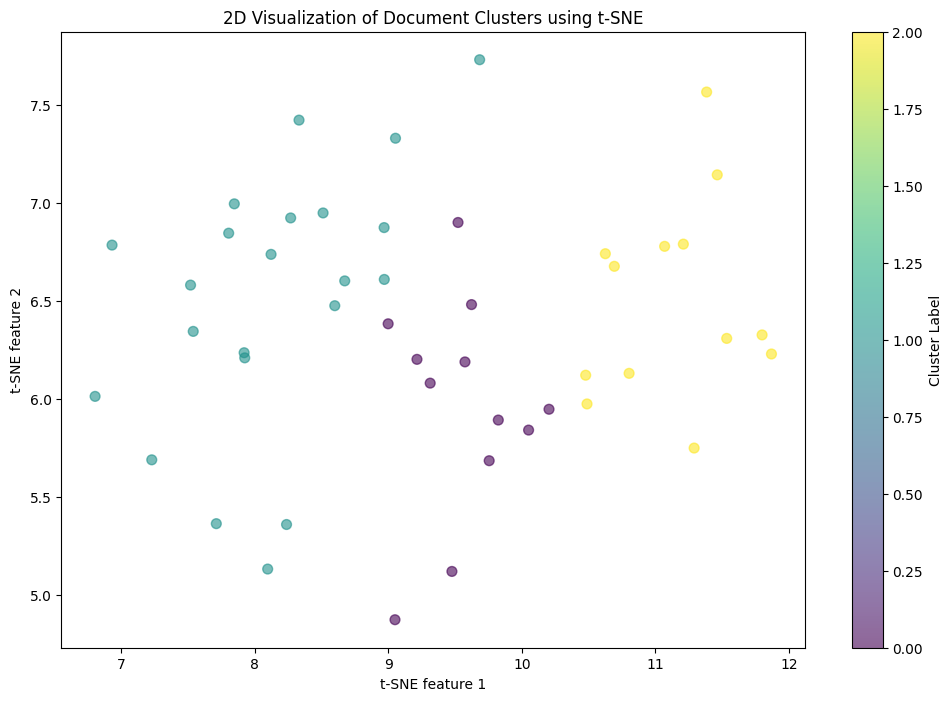

In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Using t-SNE for dimensionality reduction to 2 dimensions
tsne = TSNE(n_components=2, random_state=42)
X_reduced = tsne.fit_transform(X)

# Plotting the results
plt.figure(figsize=(12, 8))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=kmeans_labels, cmap='viridis', s=50, alpha=0.6)
plt.title('2D Visualization of Document Clusters using t-SNE')
plt.colorbar(label='Cluster Label')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.show()
